In [1]:
import rootpath
import sys
sys.path.append(rootpath.detect())
import os
import numpy as np

from testsuite.results import Result, ResultsContainer

In [2]:
results_dir = os.path.join(rootpath.detect(), 'experiments/directed/data/wfg1_2obj_3dim/log_data/OF_objective_function__opt_DirectedSaf__ninit_10__surrogate_MultiSurrogateGP__ei_False__target_0p35_3p14__w_0p5')
assert os.path.isdir(results_dir)
results_dir

'/home/finley/phd/code/testsuite/experiments/directed/data/wfg1_2obj_3dim/log_data/OF_objective_function__opt_DirectedSaf__ninit_10__surrogate_MultiSurrogateGP__ei_False__target_0p35_3p14__w_0p5'

In [3]:
result_paths = [os.path.join(results_dir, path) for path in os.listdir(results_dir) if path[-11:] == "results.pkl"]

In [4]:
results = ResultsContainer(result_paths)
results.sort("seed")

In [5]:
results.compute_hpv_history(reference_point=(np.ones(2)*3).reshape(1, -1))


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False



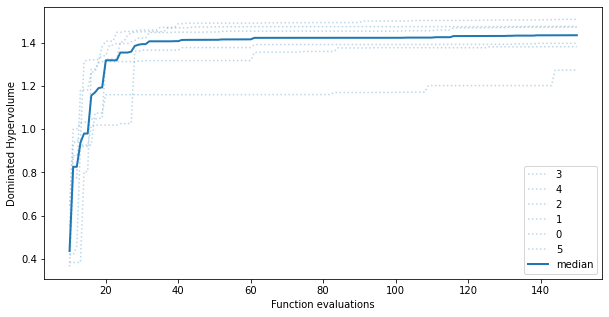

In [6]:
fig = results.plot_hpv();

In [7]:
intervals = [20, 30, 40, 50, 60]
median, iqr = results.get_intervals(measure="hpv", intervals=intervals)

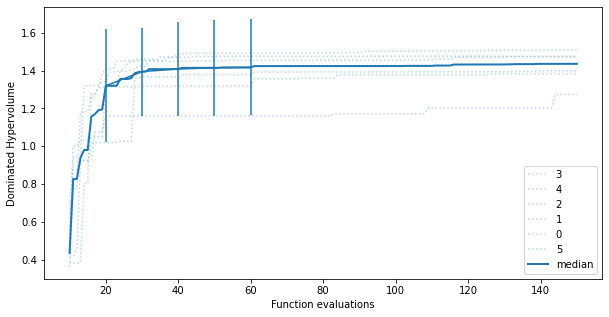

In [8]:
ax = fig.gca()
ax.errorbar(intervals, median, iqr[0]-median, iqr[1]-median, c="C0")
fig